In [1]:
import csv, os
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
import math
import sys
from sklearn.metrics import mean_squared_error

In [2]:
def ada(X, Y, w, eta, iteration, lambdaL2):
    s_grad = np.zeros(len(X[0]))
    list_cost = []
    for i in range(iteration):
        hypo = np.dot(X,w)
        loss = hypo - Y
        cost = np.sum(loss**2)/len(X)
        list_cost.append(cost)

        grad = np.dot(X.T, loss)/len(X) + lambdaL2*w
        s_grad += grad**2
        ada = np.sqrt(s_grad)
        w = w - eta*grad/ada
    return w, list_cost

In [3]:
def SGD(X, Y, w, eta, iteration, lambdaL2):
    list_cost = []
    for i in range(iteration):
        hypo = np.dot(X,w)
        loss = hypo - Y
        cost = np.sum(loss**2)/len(X)
        list_cost.append(cost)

        rand = np.random.randint(0, len(X))
        grad = X[rand]*loss[rand]/len(X) + lambdaL2*w
        w = w - eta*grad
    return w, list_cost

In [4]:
def GD(X, Y, w, eta, iteration, lambdaL2):
    list_cost = []
    for i in range(iteration):
        hypo = np.dot(X,w)
        loss = hypo - Y
        cost = np.sum(loss**2)/len(X)
        list_cost.append(cost)

        grad = np.dot(X.T, loss)/len(X) + lambdaL2 * w
        w = w - eta*grad
    return w, list_cost

In [5]:
# (18, 1) feat
data = []
for i in range(18):
    data.append([])

# read data

In [6]:
#read data
n_row = 0
text = open('data/train.csv', 'r')
row = csv.reader(text, delimiter=',')
for r in row:
    if n_row != 0:
        for i in range(3,27):
            if r[i] != "NR":
                data[(n_row-1)%18].append(float(r[i]))
            else:
                data[(n_row-1)%18].append(float(0))
    n_row = n_row + 1
text.close()

# data (18, 5760)

# parse data to trainX and trainY

In [7]:
x = []
y = []
for i in range(12):
    for j in range(471):
        x.append([])
        for t in range(18):
            for s in range(9):
                x[471*i + j].append(data[t][480*i+j+s])
        y.append(data[9][480*i+j+9])
trainX = np.array(x) # (5652, 162)
trainY = np.array(y) # (5652,)

# parse test data

In [8]:
test_x = []
n_row = 0
text = open('data/test.csv' ,"r")
row = csv.reader(text , delimiter= ",")

for r in row:
    if n_row %18 == 0:
        test_x.append([])
        for i in range(2,11):
            test_x[n_row//18].append(float(r[i]) )
    else :
        for i in range(2,11):
            if r[i] !="NR":
                test_x[n_row//18].append(float(r[i]))
            else:
                test_x[n_row//18].append(0)
    n_row = n_row+1
text.close()
test_x = np.array(test_x) # (240, 162)

# parse answer

In [9]:
ans_y = []
n_row = 0
text = open('data/ans.csv', "r")
row = csv.reader(text, delimiter=",")

for r in row:
    ans_y.append(r[1])

ans_y = ans_y[1:]
ans_y = np.array(list(map(int, ans_y)))

# add bias

In [10]:
test_x = np.concatenate((np.ones((test_x.shape[0],1)),test_x), axis=1)
trainX = np.concatenate((np.ones((trainX.shape[0],1)), trainX), axis=1)

# train data

In [11]:
w = np.zeros(len(trainX[0]))
w_sgd, cost_list_sgd = SGD(trainX, trainY, w, eta=0.0001, iteration=20000, lambdaL2=0)
# w_sgd50, cost_list_sgd50 = SGD(trainX, trainY, w, eta=0.0001, iteration=20000, lambdaL2=50)
w_ada, cost_list_ada = ada(trainX, trainY, w, eta=1, iteration=20000, lambdaL2=0)
# w_gd, cost_list_gd = SGD(trainX, trainY, w, eta=0.0001, iteration=20000, lambdaL2=0)

In [26]:
w_ada, cost_list_ada = ada(trainX, trainY, w, eta=1, iteration=20000, lambdaL2=0)
cost_list_ada[-1]

33.19502205543842

In [12]:
cost_list_ada[-1], cost_list_sgd[-1]

(33.19502205543842, 110.80964420929854)

# close form

In [13]:
w_cf = np.linalg.inv(trainX.T.dot(trainX)).dot(trainX.T).dot(trainY)
cost_wcf = np.sum((trainX.dot(w_cf)-trainY)**2) / len(trainX)
hori = [cost_wcf for i in range(20000-3)]

# output test data

In [14]:
y_ada = np.dot(test_x, w_ada)
y_sgd = np.dot(test_x, w_sgd)
y_cf = np.dot(test_x, w_cf)

In [20]:
print(f"ada mse = {mean_squared_error(ans_y, y_ada)}")

ada mse = 808.4551601563477


In [21]:
mean_squared_error(y_cf, y_ada)

1.4951641873718065

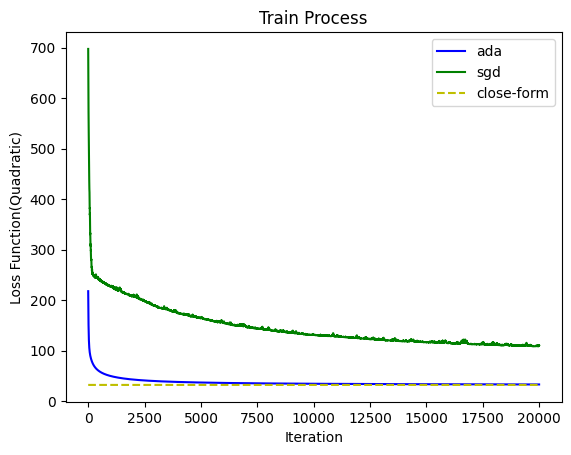

In [15]:
#plot training data with different gradiant method
plt.plot(np.arange(len(cost_list_ada[3:])), cost_list_ada[3:], 'b', label="ada")
plt.plot(np.arange(len(cost_list_sgd[3:])), cost_list_sgd[3:], 'g', label='sgd')
# plt.plot(np.arange(len(cost_list_sgd50[3:])), cost_list_sgd50[3:], 'c', label='sgd50')
# plt.plot(np.arange(len(cost_list_gd[3:])), cost_list_gd[3:], 'r', label='gd')
plt.plot(np.arange(len(cost_list_ada[3:])), hori, 'y--', label='close-form')
plt.title('Train Process')
plt.xlabel('Iteration')
plt.ylabel('Loss Function(Quadratic)')
plt.legend()
# plt.savefig(os.path.join(os.path.dirname(__file__), "figures/TrainProcess"))
plt.show()

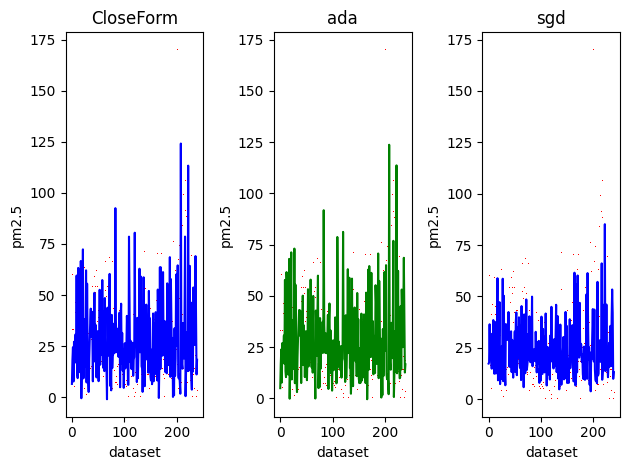

In [17]:
#plot fianl answer
plt.figure()
plt.subplot(131)
plt.title('CloseForm')
plt.xlabel('dataset')
plt.ylabel('pm2.5')
plt.plot(np.arange((len(ans_y))), ans_y, 'r,')
plt.plot(np.arange(240), y_cf, 'b')
plt.subplot(132)
plt.title('ada')
plt.xlabel('dataset')
plt.ylabel('pm2.5')
plt.plot(np.arange((len(ans_y))), ans_y, 'r,')
plt.plot(np.arange(240), y_ada, 'g')
plt.subplot(133)
plt.title('sgd')
plt.xlabel('dataset')
plt.ylabel('pm2.5')
plt.plot(np.arange((len(ans_y))), ans_y, 'r,')
plt.plot(np.arange(240), y_sgd, 'b')
plt.tight_layout()
# plt.savefig(os.path.join(os.path.dirname(__file__), "figures/Compare"))
plt.show()